In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from tensorflow.keras.layers import LSTM, Dense, Flatten, GlobalMaxPool1D, Input, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

## test LSTM and simpleRNN on short squences

### make label from random numbers use specific elements in sequences

In [4]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

#labels make using last 3 number is sequence, we have short sequence for now
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## simpleRNN on short sequence

In [15]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

In [16]:
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 8ms/step - loss: 0.7018 - accuracy: 0.5248 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6611 - accuracy: 0.6220 - val_loss: 0.6437 - val_accuracy: 0.6360
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6260 - accuracy: 0.6684 - val_loss: 0.6035 - val_accuracy: 0.7124
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5826 - accuracy: 0.7308 - val_loss: 0.5526 - val_accuracy: 0.7536
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.5287 - accuracy: 0.7716 - val_loss: 0.4881 - val_accuracy: 0.8164
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.8176 - val_loss: 0.4262 - val_accuracy: 0.8592
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.4053 - accuracy: 0.8532 - val_loss: 0.3625 - val_accuracy: 0.8804
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0709 - val_accuracy: 0.9796
Epoch 60/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0760 - val_accuracy: 0.9804
Epoch 61/200
79/79 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 62/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0681 - accuracy: 0.9780 - val_loss: 0.0622 - val_accuracy: 0.9836
Epoch 63/200
79/79 [==============================] - 1s 7ms/step - loss: 0.0695 - accuracy: 0.9796 - val_loss: 0.0638 - val_accuracy: 0.9860
Epoch 64/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0620 - accuracy: 0.9828 - val_loss: 0.0608 - val_accuracy: 0.9828
Epoch 65/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.0671 - val_accuracy: 0.9848
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9872 - val_loss: 0.0490 - val_accuracy: 0.9864
Epoch 117/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9876 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 118/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.9888 - val_loss: 0.0538 - val_accuracy: 0.9852
Epoch 119/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9888 - val_loss: 0.0505 - val_accuracy: 0.9884
Epoch 120/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0454 - val_accuracy: 0.9904
Epoch 121/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9896 - val_loss: 0.0491 - val_accuracy: 0.9872
Epoch 122/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9876 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 123/200

79/79 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.9900 - val_loss: 0.0396 - val_accuracy: 0.9916
Epoch 174/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0343 - accuracy: 0.9908 - val_loss: 0.0399 - val_accuracy: 0.9904
Epoch 175/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9928 - val_loss: 0.0477 - val_accuracy: 0.9908
Epoch 176/200
79/79 [==============================] - 1s 6ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.0595 - val_accuracy: 0.9888
Epoch 177/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0475 - val_accuracy: 0.9896
Epoch 178/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9880 - val_loss: 0.0561 - val_accuracy: 0.9880
Epoch 179/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9920 - val_loss: 0.0509 - val_accuracy: 0.9900
Epoch 180/200

### simpleRNN work fine on short term memory which use last 3 elements of a short sequence to make label

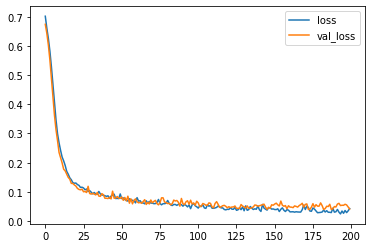

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

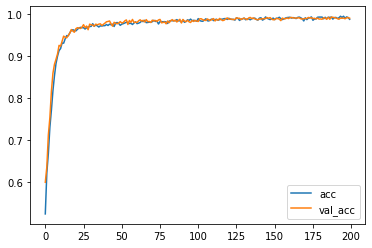

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## LSTM on short squence

In [7]:
# make the RNN
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

In [9]:
r = model.fit(
  inputs, Y,
  epochs=200,
validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 0.0222 - val_accuracy: 0.9944
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9952 - val_loss: 0.0217 - val_accuracy: 0.9936
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0246 - val_accuracy: 0.9900
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9964 - val_loss: 0.0226 - val_accuracy: 0.9912
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9968 - val_loss: 0.0209 - val_accuracy: 0.9924
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0208 - val_accuracy: 0.9952
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.0219 - val_accuracy: 0.9920
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0237 - val_accuracy: 0.9920
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0226 - val_accuracy: 0.9932
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0222 - val_accuracy: 0.9936
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0219 - val_accuracy: 0.9936
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0227 - val_accuracy: 0.9936
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0241 - val_accuracy: 0.9932
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9956 - val_loss: 0.0757 - val_accuracy: 0.9876
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0359 - val_accuracy: 0.9940
Epoch 118/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9980 - val_loss: 0.0455 - val_accuracy: 0.9912
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0387 - val_accuracy: 0.9920
Epoch 120/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0375 - val_accuracy: 0.9904
Epoch 121/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0355 - val_accuracy: 0.9924
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9932
Epoch 123/200

79/79 [==============================] - 0s 3ms/step - loss: 8.0750e-04 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9904
Epoch 173/200
79/79 [==============================] - 0s 4ms/step - loss: 7.8857e-04 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9904
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 7.2581e-04 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9900
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 6.8177e-04 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9904
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 6.3923e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9904
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 6.0465e-04 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9900
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 5.8611e-04 - accuracy: 1.0000 - val_loss: 0.0431 - val_ac

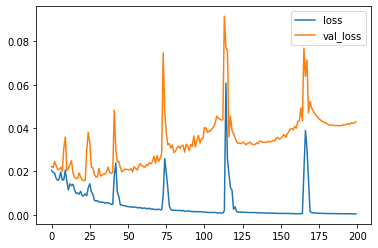

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

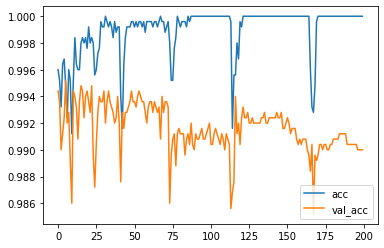

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## use squence need long memory

In [13]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## test simpleRNN for long term memory

In [14]:

inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7053 - accuracy: 0.4872 - val_loss: 0.6951 - val_accuracy: 0.4968
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4960 - val_loss: 0.6955 - val_accuracy: 0.5012
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.4900 - val_loss: 0.6943 - val_accuracy: 0.4956
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4968 - val_loss: 0.6934 - val_accuracy: 0.5092
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.5036 - val_loss: 0.6946 - val_accuracy: 0.4988
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5084
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6961 - accuracy: 0.4856 - val_loss: 0.6937 - val_accuracy: 0.5104
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1393 - accuracy: 0.9628 - val_loss: 0.3916 - val_accuracy: 0.8784
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.9664 - val_loss: 0.0940 - val_accuracy: 0.9784
Epoch 61/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9780 - val_loss: 0.0838 - val_accuracy: 0.9796
Epoch 62/200
79/79 [==============================] - 1s 6ms/step - loss: 0.0894 - accuracy: 0.9780 - val_loss: 0.1809 - val_accuracy: 0.9504
Epoch 63/200
79/79 [==============================] - 1s 8ms/step - loss: 0.1935 - accuracy: 0.9432 - val_loss: 0.3230 - val_accuracy: 0.8856
Epoch 64/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1507 - accuracy: 0.9560 - val_loss: 0.1202 - val_accuracy: 0.9696
Epoch 65/200
79/79 [==============================] - 1s 6ms/step - loss: 0.2701 - accuracy: 0.9116 - val_loss: 0.1561 - val_accuracy: 0.9628
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 0.1033 - accuracy: 0.9744 - val_loss: 0.0863 - val_accuracy: 0.9784
Epoch 117/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4387 - accuracy: 0.8488 - val_loss: 0.6267 - val_accuracy: 0.6756
Epoch 118/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5708 - accuracy: 0.7372 - val_loss: 0.5443 - val_accuracy: 0.7644
Epoch 119/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4483 - accuracy: 0.8128 - val_loss: 0.2945 - val_accuracy: 0.8968
Epoch 120/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.9044 - val_loss: 0.4056 - val_accuracy: 0.8404
Epoch 121/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.8836 - val_loss: 0.3062 - val_accuracy: 0.8828
Epoch 122/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1780 - accuracy: 0.9480 - val_loss: 0.1126 - val_accuracy: 0.9736
Epoch 123/200

79/79 [==============================] - 0s 5ms/step - loss: 0.0721 - accuracy: 0.9860 - val_loss: 0.0732 - val_accuracy: 0.9840
Epoch 174/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9864 - val_loss: 0.0686 - val_accuracy: 0.9848
Epoch 175/200
79/79 [==============================] - 1s 6ms/step - loss: 0.2336 - accuracy: 0.9336 - val_loss: 0.1687 - val_accuracy: 0.9516
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1435 - accuracy: 0.9640 - val_loss: 0.0941 - val_accuracy: 0.9760
Epoch 177/200
79/79 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 0.9776 - val_loss: 0.0899 - val_accuracy: 0.9788
Epoch 178/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0991 - accuracy: 0.9764 - val_loss: 0.1117 - val_accuracy: 0.9716
Epoch 179/200
79/79 [==============================] - 1s 7ms/step - loss: 0.1901 - accuracy: 0.9504 - val_loss: 0.7735 - val_accuracy: 0.7872
Epoch 180/200

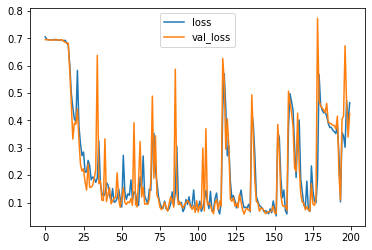

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

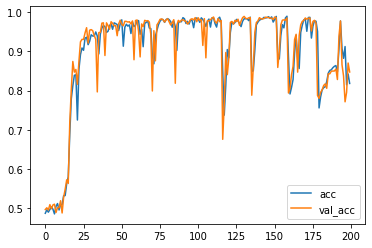

In [16]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## simpleRNN fail on Long term memory. so test LSTM

In [19]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.4888 - val_loss: 0.6933 - val_accuracy: 0.5028
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4972 - val_loss: 0.6940 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5096
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4884 - val_loss: 0.6926 - val_accuracy: 0.5048
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5108 - val_loss: 0.6927 - val_accuracy: 0.5112
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4924 - val_loss: 0.6927 - val_accuracy: 0.5052
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6926 - val_accuracy: 0.5096
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9880 - val_loss: 0.0597 - val_accuracy: 0.9808
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9904 - val_loss: 0.0475 - val_accuracy: 0.9848
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9864 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.0433 - val_accuracy: 0.9836
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0462 - val_accuracy: 0.9860
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9868 - val_loss: 0.0435 - val_accuracy: 0.9860
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.0301 - val_accuracy: 0.9908
Epoch 117/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.0289 - val_accuracy: 0.9920
Epoch 118/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 119/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 120/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9948 - val_loss: 0.0637 - val_accuracy: 0.9860
Epoch 121/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 123/200

79/79 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0280 - val_accuracy: 0.9928
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0297 - val_accuracy: 0.9936
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.9988 - val_loss: 0.0258 - val_accuracy: 0.9932
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.0331 - val_accuracy: 0.9928
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0274 - val_accuracy: 0.9928
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0327 - val_accuracy: 0.9928
Epoch 180/200

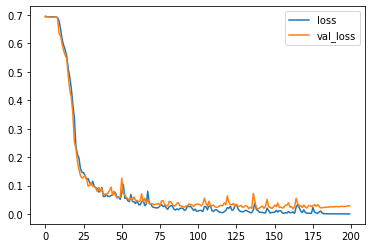

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

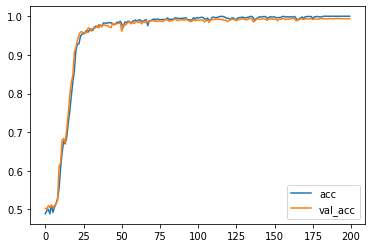

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## as LSTM work fine, increase squence lenght

In [22]:
T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [23]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6950 - val_accuracy: 0.4892
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4824
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6948 - val_accuracy: 0.4888
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6952 - val_accuracy: 0.4896
Epoch 5/200
79/79 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.52 - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5216 - val_loss: 0.6950 - val_accuracy: 0.4932
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5084 - val_loss: 0.6950 - val_accuracy: 0.4928
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5152 - val_loss: 0

79/79 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6012 - val_loss: 0.7200 - val_accuracy: 0.5020
Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5984 - val_loss: 0.7230 - val_accuracy: 0.5088
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5852 - val_loss: 0.7212 - val_accuracy: 0.5020
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5904 - val_loss: 0.7250 - val_accuracy: 0.4996
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.5876 - val_loss: 0.7257 - val_accuracy: 0.5036
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6080 - val_loss: 0.7262 - val_accuracy: 0.4988
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.5896 - val_loss: 0.7290 - val_accuracy: 0.5012
Epoch 65/200
79/79 

Epoch 116/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6128 - val_loss: 0.7349 - val_accuracy: 0.5076
Epoch 117/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6044 - val_loss: 0.7325 - val_accuracy: 0.5068
Epoch 118/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6084 - val_loss: 0.7356 - val_accuracy: 0.4988
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6096 - val_loss: 0.7336 - val_accuracy: 0.4972
Epoch 120/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6096 - val_loss: 0.7358 - val_accuracy: 0.4992
Epoch 121/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6188 - val_loss: 0.7341 - val_accuracy: 0.4996
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6204 - val_loss: 0.7429 - val_accuracy: 0.4988

79/79 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6168 - val_loss: 0.7488 - val_accuracy: 0.4960
Epoch 174/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6591 - accuracy: 0.6084 - val_loss: 0.7452 - val_accuracy: 0.4936
Epoch 175/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6184 - val_loss: 0.7435 - val_accuracy: 0.5068
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6216 - val_loss: 0.7435 - val_accuracy: 0.5016
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6248 - val_loss: 0.7451 - val_accuracy: 0.4964
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6244 - val_loss: 0.7435 - val_accuracy: 0.4908
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6140 - val_loss: 0.7412 - val_accuracy: 0.4932
Epoch 180/200

## not good result!

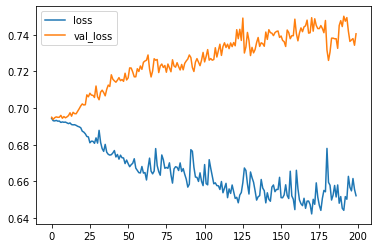

In [24]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## accuracy is 50, it means it is like random guess

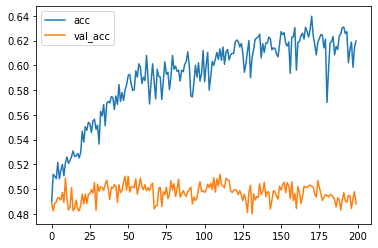

In [25]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## increase sequence length again!

In [40]:
T = 30
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [41]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))
x = LSTM(20)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6950 - accuracy: 0.4904 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5064 - val_loss: 0.6928 - val_accuracy: 0.4988
Epoch 3/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6927 - val_accuracy: 0.4948
Epoch 4/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5168 - val_loss: 0.6933 - val_accuracy: 0.5132
Epoch 5/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6941 - val_accuracy: 0.5104
Epoch 6/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5244 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 7/400
79/79 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5108 - val_loss: 0.6929 - val_accuracy: 0.4964
Epoch 8/400
7

Epoch 59/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.7776 - val_loss: 0.9529 - val_accuracy: 0.5168
Epoch 60/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7600 - val_loss: 0.9603 - val_accuracy: 0.5072
Epoch 61/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7644 - val_loss: 0.9617 - val_accuracy: 0.5040
Epoch 62/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7724 - val_loss: 0.9632 - val_accuracy: 0.4964
Epoch 63/400
79/79 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.7224 - val_loss: 0.9426 - val_accuracy: 0.5008
Epoch 64/400
79/79 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7480 - val_loss: 0.9496 - val_accuracy: 0.4984
Epoch 65/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7672 - val_loss: 1.0080 - val_accuracy: 0.4876
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.7980 - val_loss: 1.2316 - val_accuracy: 0.5056
Epoch 117/400
79/79 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8120 - val_loss: 1.1819 - val_accuracy: 0.5048
Epoch 118/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8020 - val_loss: 1.2005 - val_accuracy: 0.4932
Epoch 119/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.8080 - val_loss: 1.2231 - val_accuracy: 0.4936
Epoch 120/400
79/79 [==============================] - 0s 5ms/step - loss: 0.3968 - accuracy: 0.8160 - val_loss: 1.2417 - val_accuracy: 0.4948
Epoch 121/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3652 - accuracy: 0.8344 - val_loss: 1.2730 - val_accuracy: 0.4888
Epoch 122/400
79/79 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.7700 - val_loss: 1.2009 - val_accuracy: 0.4864
Epoch 123/400

79/79 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8448 - val_loss: 1.4227 - val_accuracy: 0.4872
Epoch 174/400
79/79 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.8392 - val_loss: 1.4200 - val_accuracy: 0.4924
Epoch 175/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.8772 - val_loss: 1.4226 - val_accuracy: 0.4940
Epoch 176/400
79/79 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.8856 - val_loss: 1.4112 - val_accuracy: 0.4940
Epoch 177/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3109 - accuracy: 0.8648 - val_loss: 1.4335 - val_accuracy: 0.5020
Epoch 178/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8420 - val_loss: 1.4622 - val_accuracy: 0.4832
Epoch 179/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8288 - val_loss: 1.3469 - val_accuracy: 0.5000
Epoch 180/400

79/79 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.8112 - val_loss: 1.0900 - val_accuracy: 0.4952
Epoch 231/400
79/79 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8156 - val_loss: 1.1041 - val_accuracy: 0.5060
Epoch 232/400
79/79 [==============================] - 0s 5ms/step - loss: 0.3663 - accuracy: 0.8304 - val_loss: 1.1622 - val_accuracy: 0.4944
Epoch 233/400
79/79 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8488 - val_loss: 1.2076 - val_accuracy: 0.5004
Epoch 234/400
79/79 [==============================] - 1s 7ms/step - loss: 0.3621 - accuracy: 0.8376 - val_loss: 1.1980 - val_accuracy: 0.4936
Epoch 235/400
79/79 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.7964 - val_loss: 1.1725 - val_accuracy: 0.4952
Epoch 236/400
79/79 [==============================] - 0s 5ms/step - loss: 0.4069 - accuracy: 0.8088 - val_loss: 1.1728 - val_accuracy: 0.4964
Epoch 237/400

79/79 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8504 - val_loss: 1.5039 - val_accuracy: 0.4904
Epoch 288/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8712 - val_loss: 1.5369 - val_accuracy: 0.4880
Epoch 289/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8680 - val_loss: 1.5271 - val_accuracy: 0.4960
Epoch 290/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.8996 - val_loss: 1.5749 - val_accuracy: 0.4896
Epoch 291/400
79/79 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.8664 - val_loss: 1.5641 - val_accuracy: 0.5140
Epoch 292/400
79/79 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.8084 - val_loss: 1.4744 - val_accuracy: 0.5132
Epoch 293/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.8684 - val_loss: 1.4873 - val_accuracy: 0.5008
Epoch 294/400

79/79 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.8896 - val_loss: 1.5283 - val_accuracy: 0.5064
Epoch 345/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9104 - val_loss: 1.5867 - val_accuracy: 0.5004
Epoch 346/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2373 - accuracy: 0.9160 - val_loss: 1.6062 - val_accuracy: 0.4964
Epoch 347/400
79/79 [==============================] - 0s 6ms/step - loss: 0.2651 - accuracy: 0.8968 - val_loss: 1.5649 - val_accuracy: 0.4928
Epoch 348/400
79/79 [==============================] - 0s 4ms/step - loss: 0.2852 - accuracy: 0.8832 - val_loss: 1.5795 - val_accuracy: 0.5048
Epoch 349/400
79/79 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8716 - val_loss: 1.5935 - val_accuracy: 0.5076
Epoch 350/400
79/79 [==============================] - 1s 10ms/step - loss: 0.4753 - accuracy: 0.7932 - val_loss: 1.4232 - val_accuracy: 0.5044
Epoch 351/40

## again result is bad!!

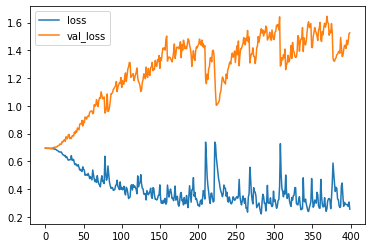

In [42]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

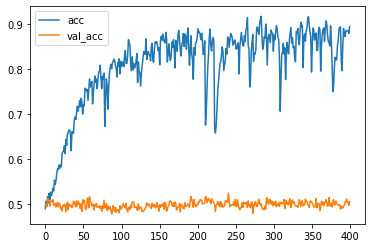

In [43]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## use global max pooling may help for long term memories

In [37]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6961 - accuracy: 0.4768 - val_loss: 0.6930 - val_accuracy: 0.5064
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4884 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6928 - val_accuracy: 0.5120
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5088
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5012
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6943 - val_accuracy: 0.4972
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.97 - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9768 - val_loss: 0.1004 - val_accuracy: 0.9740
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9764 - val_loss: 0.0974 - val_accuracy: 0.9740
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0782 - accuracy: 0.9788 - val_loss: 0.0974 - val_accuracy: 0.9748
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.9588 - val_loss: 0.6317 - val_accuracy: 0.8384
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.9220 - val_loss: 0.1857 - val_accuracy: 0.9464
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9572 - val_loss: 0.1426 - val_accuracy: 0.9608
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9680 - val_

79/79 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 0.9960 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 117/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9948 - val_loss: 0.0848 - val_accuracy: 0.9792
Epoch 118/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9892 - val_loss: 0.0335 - val_accuracy: 0.9884
Epoch 119/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9928 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 120/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9948 - val_loss: 0.0328 - val_accuracy: 0.9872
Epoch 121/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 122/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.0337 - val_accuracy: 0.9876
Epoch 123/200

79/79 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0278 - val_accuracy: 0.9920
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0232 - val_accuracy: 0.9932
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0251 - val_accuracy: 0.9924
Epoch 177/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0245 - val_accuracy: 0.9924
Epoch 178/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0272 - val_accuracy: 0.9924
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0242 - val_accuracy: 0.9920
Epoch 180/200

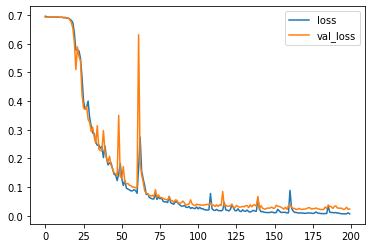

In [38]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

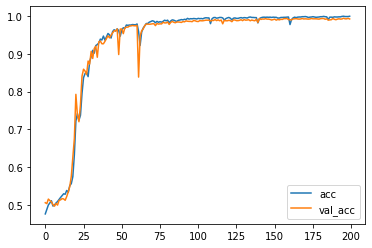

In [39]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()